In [ ]:
!pip install pyswarm

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyswarm import pso

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/#KULIAH/TUBES PBE_Data Penjualan Mobil - 2014.csv')

In [ ]:
data.head(20)

,Periode,Toyota,Daihatsu
0,2010,280680,118591
1,2011,310674,139544
2,2012,405414,162742
3,2013,434232,185942
4,2014,399119,185226
5,2015,321818,167808
6,2016,381570,199364
7,2017,371332,186859
8,2018,352161,202738
9,2019,331797,177284


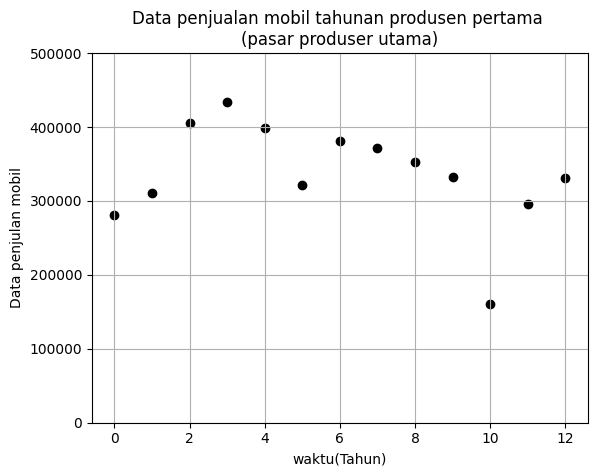

In [ ]:

plt.scatter(data.index, data['Toyota'], c='black')
plt.xlabel('waktu(Tahun)')
plt.ylabel('Data penjulan mobil')
plt.title('Data penjualan mobil tahunan produsen pertama')
plt.ylim(0, 500000)
plt.grid()
plt.show()

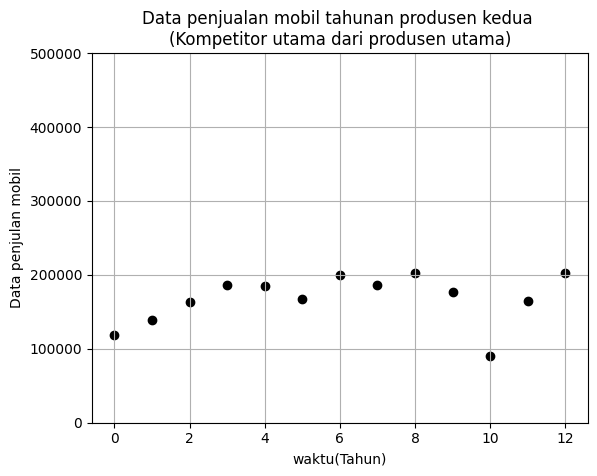

In [ ]:
plt.scatter(data.index, data['Daihatsu'], color='black')
plt.xlabel('waktu(Tahun)')
plt.ylabel('Data penjulan mobil')
plt.title('Data penjualan mobil tahunan produsen kedua \n(Kompetitor utama dari produsen utama)')
plt.ylim(0, 500000)
plt.grid()
plt.show()

In [ ]:
def calculate_mape(params):
    n = len(data)
    y1_prediction = params[0] * data['Toyota']
    y2_prediction = params[1] * data['Daihatsu']

    error = np.abs((y1_prediction - data['Toyota']) / data['Toyota']) + np.abs((y2_prediction - data['Daihatsu']) / data['Daihatsu'])
    mape = 0.5 * (1 / n) * np.sum(error)

    return mape

S = 50
n = 4
lb = [0, 0, 0, 0]  # Lower bound untuk parameter [a1, a2, b1, b2]
ub = [1, 1, 1e-7, 1e-7]  # Upper bound untuk parameter [a1, a2, b1, b2]

initial_positions = np.random.uniform(lb, ub, (S, n))

def objective_function(params):
    return calculate_mape(params)

param_history = []
mape_history = []


In [ ]:
for iter_count in range(300):
    swarm_pos = np.random.uniform(lb, ub, (S, n))
    swarm_mape = np.array([objective_function(p) for p in swarm_pos])
    best_idx = np.argmin(swarm_mape)
    param_history.append(swarm_pos[best_idx])
    mape_history.append(min(swarm_mape))

    best_param, _ = pso(objective_function, lb, ub, swarmsize=S, maxiter=1)

# Menampilkan nilai MAPE untuk setiap iterasi
for i, mape_value in enumerate(mape_history):
    print(f"Iterasi ke-{i+1}: MAPE={mape_value}")

# Menemukan iterasi dengan MAPE terendah
min_mape_idx = np.argmin(mape_history)
best_params = param_history[min_mape_idx]

# Menampilkan nilai parameter pada iterasi dengan MAPE terendah
print(f"Iterasi terbaik (MAPE terendah) - Iterasi ke-{min_mape_idx + 1}:")
print(f"Parameter={best_params}")

# Extracting individual parameters from best_params
best_a1, best_a2, best_b1, best_b2 = best_params

# Menampilkan hasil perhitungan MAPE pada iterasi dengan MAPE terendah
print(f"Hasil perhitungan MAPE terendah: {mape_history[min_mape_idx]}")

# Printing the best parameters
print("Parameter terbaik:")
print(f"A1 = {best_a1}")
print(f"A2 = {best_a2}")
print(f"B1 = {best_b1}")
print(f"B2 = {best_b2}")



Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 1


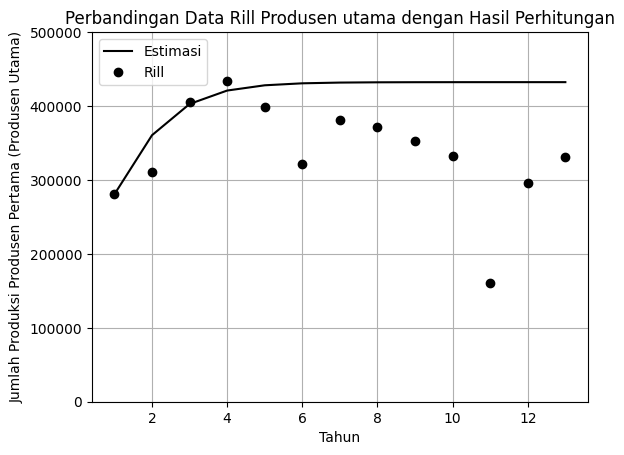

In [ ]:

# Extract relevant columns for Toyota and Daihatsu
y1 = data['Toyota'].values
y2 = data['Daihatsu'].values

# Define the system of ODEs
def dmodel(y, t, A1, B1, A2, B2, K1, K2):
    dydt = [
        A1 * y[0] * (1 - (y[0] / K1)) - B1 * y[0] * y[1],
        A2 * y[1] * (1 - (y[1] / K2)) - B2 * y[1] * y[0],
    ]
    return dydt

# Set model parameters
#iterasi ke-528 dari 600
A1 = 0.9977860363287753
A2 = 0.9995091245261686
B1 = 2.9099777961044592e-08
B2 = 3.7132213037454774e-08
K1 = 434854
K2 = 202738

# Initial conditions
initial_conditions = np.array([y1[0], y2[0]])

# Time points
tdata = np.arange(1, len(data) + 1)

# Solve ODEs
y = odeint(dmodel, initial_conditions, tdata, args=(A1, B1, A2, B2, K1, K2))

# Plotting
plt.figure(1)
plt.plot(tdata, y[:, 0], 'k', tdata, y1, 'ko')
plt.title('Perbandingan Data Rill Produsen utama dengan Hasil Perhitungan')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Produksi Produsen Pertama (Produsen Utama)')
plt.legend(['Estimasi', 'Rill'])
plt.ylim(0, 500000)
plt.grid(True)

plt.show()


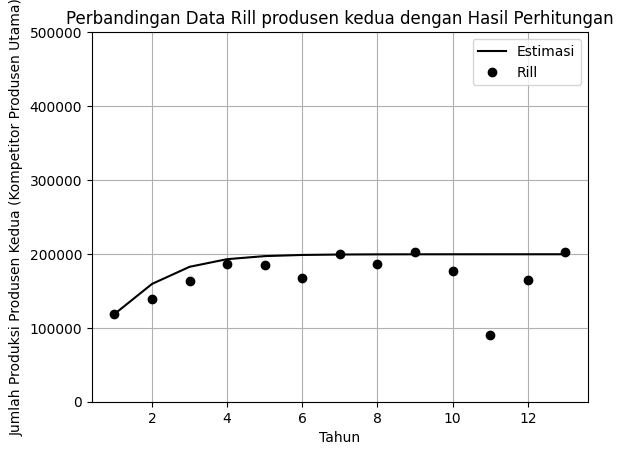

In [ ]:
# Plotting
plt.figure(2)
plt.plot(tdata, y[:,1], 'k', tdata, y2, 'ko')
plt.title('Perbandingan Data Rill produsen kedua dengan Hasil Perhitungan')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Produksi Produsen Kedua (Kompetitor Produsen Utama)')
plt.legend(['Estimasi', 'Rill'])
plt.ylim(0, 500000)
plt.grid(True)

plt.show()

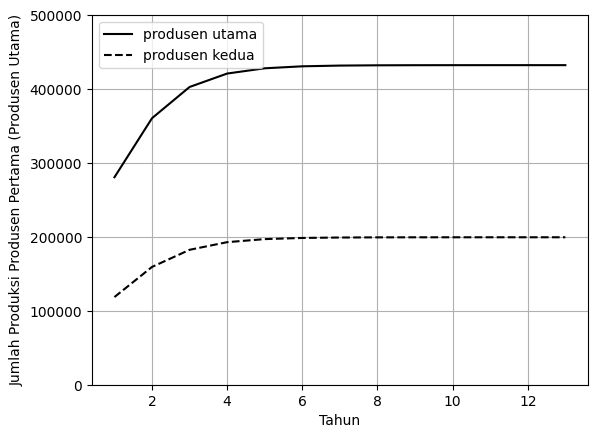

In [ ]:
# Plotting
plt.figure(1)
plt.plot(tdata, y[:, 0], 'k-', tdata, y[:, 1], 'k--')
plt.title('')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Produksi Produsen Pertama (Produsen Utama)')
plt.legend(['produsen utama', 'produsen kedua'])
plt.ylim(0, 500000)
plt.grid(True)

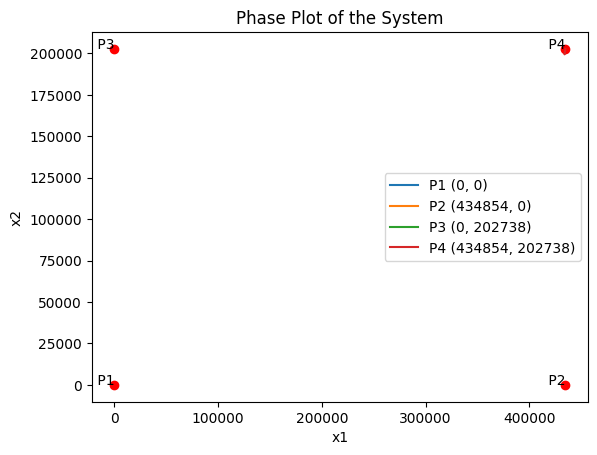

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameter
a1 = 0.9977860363287
b1 = 0.9099777961044e-8
K1 = 434854

a2 = 0.9995091245261
b2 = 3.7132213037454e-8
K2 = 202738

# Sistem persamaan diferensial
def model(variables, t):
    x1, x2 = variables
    dx1dt = a1 * x1 * (1 - x1 / K1) - b1 * x1 * x2
    dx2dt = a2 * x2 * (1 - x2 / K2) - b2 * x1 * x2
    return [dx1dt, dx2dt]

# Waktu
t = np.linspace(0, 100, 1000)

# Titik equilibrium
P1 = [0, 0]
P2 = [434854, 0]
P3 = [0, 202738]
P4 = [434854, 202738]

# Solusi numerik untuk persamaan diferensial
sol_P1 = odeint(model, P1, t)
sol_P2 = odeint(model, P2, t)
sol_P3 = odeint(model, P3, t)
sol_P4 = odeint(model, P4, t)

# Plot fase
plt.plot(sol_P1[:, 0], sol_P1[:, 1], label='P1 (0, 0)')
plt.plot(sol_P2[:, 0], sol_P2[:, 1], label='P2 (434854, 0)')
plt.plot(sol_P3[:, 0], sol_P3[:, 1], label='P3 (0, 202738)')
plt.plot(sol_P4[:, 0], sol_P4[:, 1], label='P4 (434854, 202738)')

# Anotasi titik equilibrium
plt.scatter(*P1, color='red')
plt.text(P1[0], P1[1], ' P1', ha='right')

plt.scatter(*P2, color='red')
plt.text(P2[0], P2[1], ' P2', ha='right')

plt.scatter(*P3, color='red')
plt.text(P3[0], P3[1], ' P3', ha='right')

plt.scatter(*P4, color='red')
plt.text(P4[0], P4[1], ' P4', ha='right')

# Label sumbu dan judul plot
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Phase Plot of the System')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


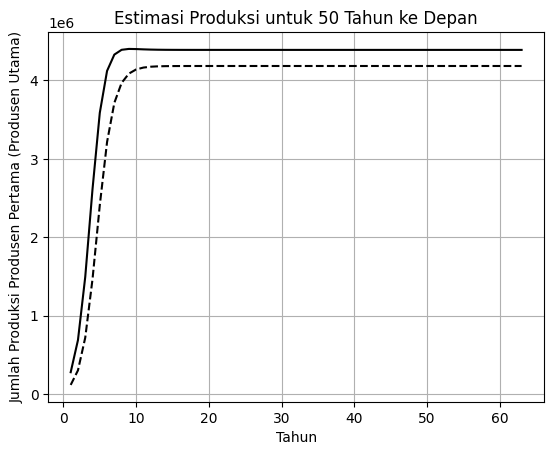

In [ ]:
# Extend time points for the next 50 years
tdata_extended = np.arange(1, len(data) + 51)

# Solve ODEs for the next 50 years
y_extended = odeint(dmodel, initial_conditions, tdata_extended, args=(A1, B1, A2, B2, K1, K2))

# Plotting for the next 50 years
plt.figure(2)
plt.plot(tdata_extended, y_extended[:, 0], 'k-')
plt.plot(tdata_extended, y_extended[:, 1], 'k--')
plt.title('Estimasi Produksi untuk 50 Tahun ke Depan')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Produksi Produsen Pertama (Produsen Utama)')
plt.grid(True)

plt.show()